# Implementation of FIR Filter in the FPGA

## Generation of the signal

In [7]:
import numpy as np
from numpy import savetxt, loadtxt
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import lfilter, firwin #fundamental to simulate a fir_filter in python

In [8]:
# Some functions that may be useful
def sine_wave(A, time, f): # creates a sine wave
    return A * np.sin(2 * np.pi * f * time)

In [9]:
# Let us generate a wave function with two main frequencies, an high one and a low one:

data_size = 125
noise = 1 # the higher the noisier
file = open("../signal.txt", "w") # the file where to write the signal to be filtered

input_sig = []

for i in range(data_size):
    sig = 62*(np.sin(i/(5*np.pi))+ noise)
    noise = -noise
    input_sig.append(sig.astype(int)) # we write it as an int
    file.write(str(sig.astype(int)))
    file.write('\n')

file.close()

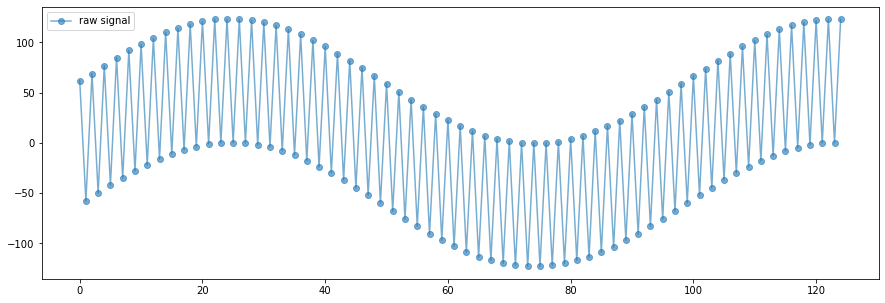

In [10]:
# Now we visualize it:
sig = np.loadtxt("../signal.txt", delimiter='\n')
t = np.arange(len(input_sig)) # array for the x coordinate, just for displaying

plt.figure(figsize=(15, 5))

plt.plot(t, sig, '-o',alpha=.6,label='raw signal')
plt.legend(loc="upper left")

## Coefficients for the Filter

In [11]:
numtaps = 4 
f = 1

# this function gives us the coefficients used in the testbench
c = signal.firwin(numtaps, f, fs=100)
print("Coefficients for the Fir Filter:", c)

# this function simulates the output of a fir_filter
python_sig = lfilter(c, 1, input_sig)

Coefficients for the Fir Filter: [0.04700274 0.45299726 0.45299726 0.04700274]


## Results

In [15]:
# After being computed on the actual FPGA
##############
code = 'eqs0d'
##############
url = 'https://transfer.sh/'+ code +'/output.txt'

! curl $url --output ../fromfpga.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   372  100   372    0     0   1075      0 --:--:-- --:--:-- --:--:--  1072


In [13]:
fname = "../fromfpga.txt"
fpga = np.loadtxt(fname, delimiter='\n')
for i in range(len(fpga)):
    # 2**10 due to truncation of bits
    # 2**9 because I multiplied the coefficients by 2**9
    fpga[i] = (2**10/2**8)*fpga[i]

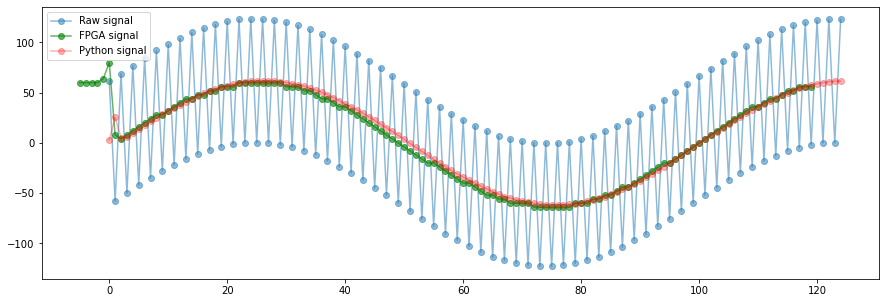

In [17]:
plt.figure(figsize=(15, 5))

plt.plot(t, input_sig, '-o',alpha=.5,label='Raw signal')
plt.plot(t-5, fpga, '-o', color='g',alpha=.6,label='FPGA signal')
plt.plot(t, python_sig, '-o', color='r',alpha=.3,label='Python signal')
#plt.title("")
#plt.xlim(0,200) #just for the latex report
plt.legend(loc="upper left")